<a href="https://colab.research.google.com/github/Arch0/EDA-Airbnb-Capstone/blob/main/Individual_final_Airbnb_Bookings_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##<b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which property type is the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 1 - Data Cleaning


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Missing values

In [10]:
(df.isnull().sum() * 100) / df.shape[0]

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

After analyzing the dataset, We got the following null rows for columns - 


1.   **0.0328%** data is missing for [name] column
2.   **20.56%** data is missing for [last_review] column
3.   **20.56%** data is missing for [reviews_per_month] column








In [11]:
#'name' and 'host_name' has very less missing values.
#we can fill these missing values with unknown & no_name respectively!

df['name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

In [12]:
# last_review have high% of missing value or this feature is not much useful, so we can drop this.
df= df.drop(['last_review'],axis=1)

In [13]:
# review_per_month have null values we can replace it with 0
df['reviews_per_month']=df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [14]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## treating price feature

In [15]:
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0,6,333


In [16]:
# Dropping the rows where price = 0

temp_rows = df.index[df['price'] == 0].tolist()

In [17]:
df.drop(temp_rows, inplace=True)

In [18]:
df.shape

(48884, 15)

## Outliers Removal

Checking for outliers in numerical column like price, minimum_nights, number_of_reviews

In [19]:
df["price"].value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
2010       1
1485       1
822        1
539        1
1880       1
Name: price, Length: 673, dtype: int64

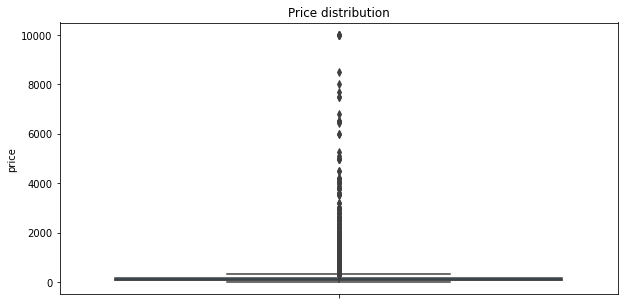

In [20]:
plt.figure(figsize=(10,5))
vio_plt=sns.boxplot(data=df, y='price')
vio_plt.set_title('Price distribution')
plt.show()

There is outliers in price, we have to remove this
1. randomly removing upper price range
2. or using Quartile range (First quartile: the lowest 25% of numbers
Second quartile: between 25.1% and 50% (up to the median)
Third quartile: 50.1% to 75% (above the median)
Fourth quartile: the highest 25% of numbers)
3. or interquartile range (middle 50% =Q3-Q1)

In [21]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [22]:
lower_bound,upper_bound = outlier_treatment(df['price'])

In [23]:
df1 = df[(df.price>lower_bound) & (df.price<upper_bound)]

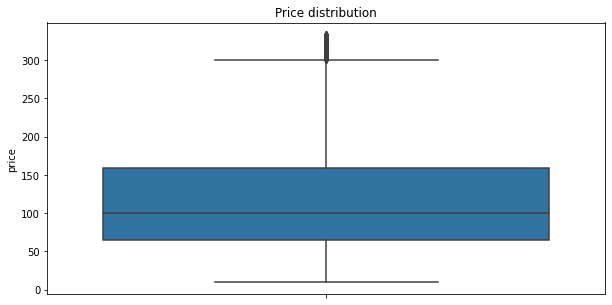

In [24]:
plt.figure(figsize=(10,5))
vio_plt=sns.boxplot(data=df1, y='price')
vio_plt.set_title('Price distribution')
plt.show()

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45907 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45907 non-null  int64  
 1   name                            45907 non-null  object 
 2   host_id                         45907 non-null  int64  
 3   host_name                       45907 non-null  object 
 4   neighbourhood_group             45907 non-null  object 
 5   neighbourhood                   45907 non-null  object 
 6   latitude                        45907 non-null  float64
 7   longitude                       45907 non-null  float64
 8   room_type                       45907 non-null  object 
 9   price                           45907 non-null  int64  
 10  minimum_nights                  45907 non-null  int64  
 11  number_of_reviews               45907 non-null  int64  
 12  reviews_per_month               

Data cleaning is completed now, We have left 45907 rows and 15 columns which are enough to get insights from our dataset.

Now, we'll explore our dataset to get the some wonderful key understandings.

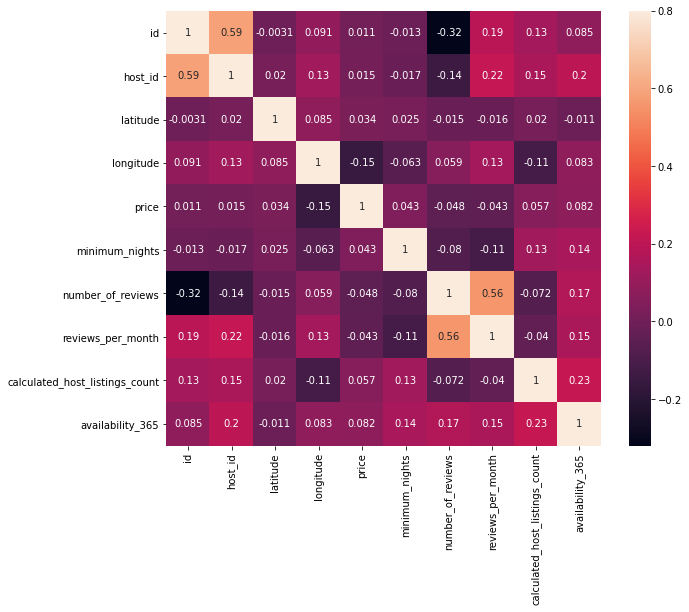

In [26]:
#correlation matrix (to check relation between features)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

Heatmap is giving clear correlation between different features that can affect a airbnb listing.





In [27]:
#top 5 listings on Airbnb in 2entire NYC:

listings_count_df=df['name'].value_counts()[:5].reset_index()

listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)

listings_count_df


,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


Hillside Hotel	has highest number of listing in NYC

In [28]:
#top 10 hosts on the basis of no of listings in entire NYC!
top_10_hosts=df['host_name'].value_counts()[:10] 
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

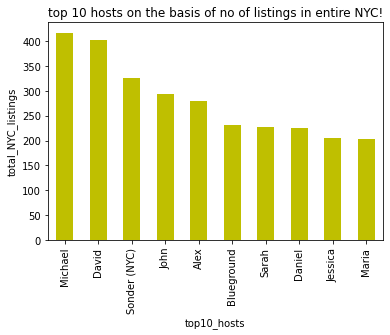

In [29]:
top_10_hosts.plot(kind='bar',color='y')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

In [30]:
top_10_neigbours= df['neighbourhood'].value_counts()[:10]

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

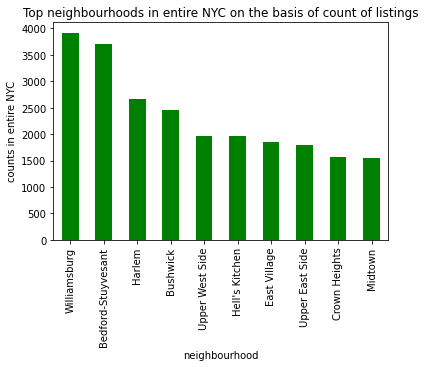

In [31]:
#Top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar',color='g')
 
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

In [32]:
# top 5 host with most number of listing
host_with_most_listings= df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(5,'calculated_host_listings_count')
largest_listings_df


,host_name,neighbourhood_group,calculated_host_listings_count
13215,Sonder (NYC),Manhattan,106929
1833,Blueground,Manhattan,53360
7274,Kara,Manhattan,14669
6539,Jeremy & Laura,Manhattan,9216
13214,Sonder,Manhattan,9216


In [33]:
# top host in each neighbourhood with most number of listing
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13215,Sonder (NYC),Manhattan,106929
7479,Kazuya,Queens,8137
14430,Vida,Brooklyn,2705
14433,Vie,Bronx,169
685,Amarjit S,Staten Island,64


In [34]:
neighbourhood_group_df = pd.DataFrame(df['neighbourhood_group'].value_counts()).reset_index().rename(columns = {'index' : 'neighbourhood_group', 'neighbourhood_group':'Total_rooms_listed'})
neighbourhood_group_df

,neighbourhood_group,Total_rooms_listed
0,Manhattan,21660
1,Brooklyn,20095
2,Queens,5666
3,Bronx,1090
4,Staten Island,373


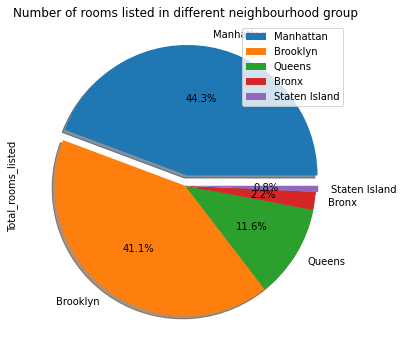

In [35]:
neighbourhood_group_df.plot.pie(y = 'Total_rooms_listed', autopct='%1.1f%%', explode = (0.08,0,0,0,0.02), labels= neighbourhood_group_df['neighbourhood_group'] ,legend = 'neighbourhood_group',shadow=True,figsize=(8, 6))
plt.title("Number of rooms listed in different neighbourhood group")
plt.show()

*Manhattan and Brooklyn Neighbourhood Group have around 85% active Properties listed on AirBnb while Staten Island and Bronx together have active listed properties less than 15%.*

In [36]:
# calculating total number of rooms for different room types

room_type_df = pd.DataFrame(df['room_type'].value_counts()).reset_index().rename(columns = {"index":'room_type', 'room_type':'Total_listed_rooms'})

room_type_df

,room_type,Total_listed_rooms
0,Entire home/apt,25407
1,Private room,22319
2,Shared room,1158


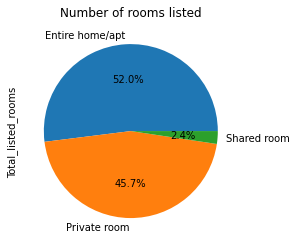

In [37]:
room_type_df.plot.pie(y = 'Total_listed_rooms', autopct='%1.1f%%',labels= room_type_df['room_type'] ,legend = False,figsize=(4,4))
plt.title("Number of rooms listed")
plt.show()

Almost 52% Entire home/apt is available for booking while 46% Shared Room is available for booking. From this insight we can know that, Most of the Host wants to give their full home/apt because they get highest price for their full property. 

## price distribution

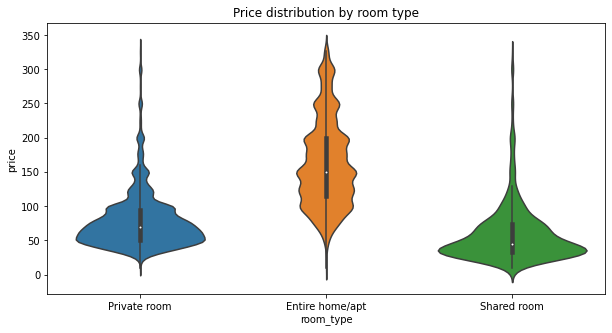

In [38]:
# Price distribution by room type
plt.figure(figsize=(10,5))
vio_plt=sns.violinplot(data=df1, x='room_type', y='price')
vio_plt.set_title('Price distribution by room type')
plt.show()

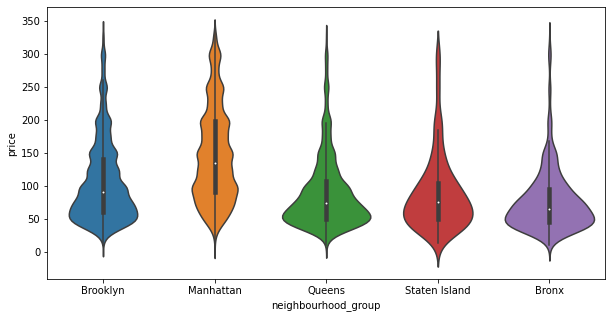

In [39]:
#Price distribution in different neighbourhood_group
plt.figure(figsize=(10,5))
sns.violinplot(x='neighbourhood_group',y='price',data=df1)
vio_plt.set_title('Price distribution in different neighbourhood_group')
plt.show()

In [40]:
avg_price_rooms = pd.DataFrame(df1.groupby(['room_type'])['price'].mean())
avg_price_rooms

,price
room_type,
Entire home/apt,162.503731
Private room,79.043658
Shared room,59.397887


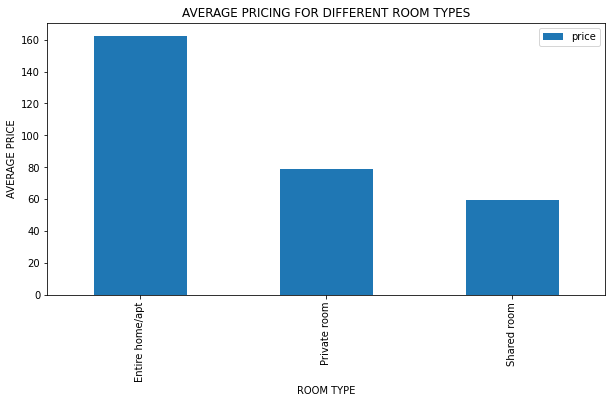

In [41]:
pd.DataFrame(df1.groupby(['room_type'])['price'].mean()).plot.bar(figsize=(10,5))
plt.xlabel('ROOM TYPE')
plt.ylabel('AVERAGE PRICE')
plt.title('AVERAGE PRICING FOR DIFFERENT ROOM TYPES')
plt.show()

In [42]:
#top 10 expensive properties
df1.nlargest(10,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]


,name,neighbourhood_group,neighbourhood,host_name,room_type
13798,Mid-Century Museum Sleepover,Brooklyn,Williamsburg,Cullen,Entire home/apt
15150,Midtown Sleep 6 Central Convenience,Manhattan,Midtown,Adam,Entire home/apt
19641,"SOMMwhere in NYC/ a unique, conscious artists ...",Manhattan,Lower East Side,Fatima,Private room
25161,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,Manhattan,Midtown,Mel,Entire home/apt
28062,27 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,Manhattan,Upper West Side,Rated,Entire home/apt
32976,Luxurious 2bed/2.5bath with Central Park Views,Manhattan,Midtown,Alex,Entire home/apt
38565,Parisian Palace in Heart of Manhattan,Manhattan,Chelsea,Aleszea,Entire home/apt
45303,Five-star luxury Apt in Chelsea !,Manhattan,Chelsea,Paola,Entire home/apt
48567,Your Private Duplex Mansion in the HEART of NYC!,Manhattan,West Village,Clinton,Entire home/apt
38756,Bright + Mod Tribeca Studio w/ Indoor pool + G...,Manhattan,Tribeca,Blueground,Entire home/apt


In [43]:
#top 10 cheapest properties
df1.nsmallest(10,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]


,name,neighbourhood_group,neighbourhood,host_name,room_type
2860,Large furnished 2 bedrooms- - 30 days Minimum,Manhattan,East Village,Sally,Entire home/apt
21700,Couch in Harlem Harvey Refugees only,Manhattan,Harlem,Morgan,Shared room
22261,"Newly renovated, fully furnished room in Brooklyn",Brooklyn,Bushwick,Katie,Private room
22287,Jen Apt,Manhattan,SoHo,Jennifer,Private room
22835,IT'S SIMPLY CONVENIENT!,Queens,Jamaica,Maria,Entire home/apt
23256,"Quiet, Cozy UES Studio Near the Subway",Manhattan,Upper East Side,Amy,Entire home/apt
24100,"Girls only, cozy room one block from Times Square",Manhattan,Hell's Kitchen,Mario,Shared room
27972,Spacious 2-bedroom Apt in Heart of Greenpoint,Brooklyn,Greenpoint,Vishanti & Jeremy,Entire home/apt
31066,"Very Spacious bedroom, steps from CENTRAL PARK.",Manhattan,Upper West Side,Salim,Private room
31407,Cozy feel at home studio,Manhattan,Kips Bay,Maureen,Private room


In [44]:
# top listing in every neighbourhood according to highest price
top=df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

top_each= top.loc[top.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_each


,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
121,Manhattan,Tribeca,490.638418
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
163,Queens,Neponsit,274.666667


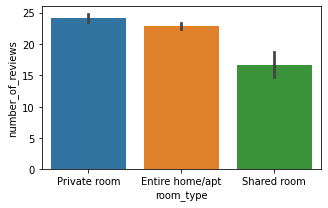

In [45]:
# number of reviews for different room types
plt.figure(figsize = (5,3))
sns.barplot(x = 'room_type', y = 'number_of_reviews', data = df)
plt.show()

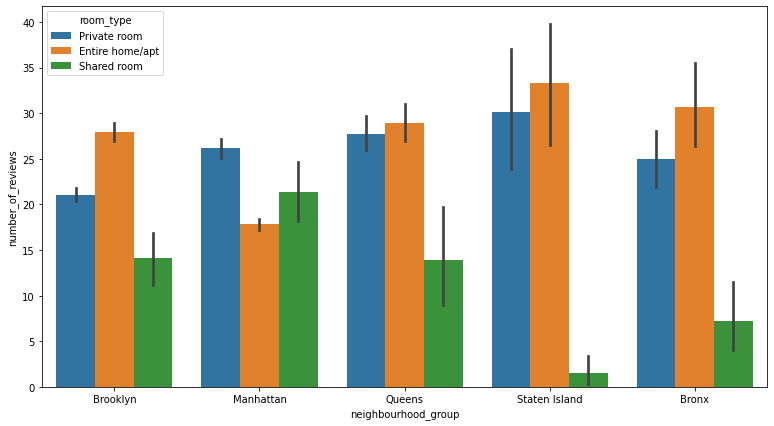

In [46]:
# number of reviews in different neighbourhood group by room type
plt.figure(figsize = (13,7))
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews', hue = 'room_type', data = df)
plt.show()

Text(0.5, 0, 'Min Stays')

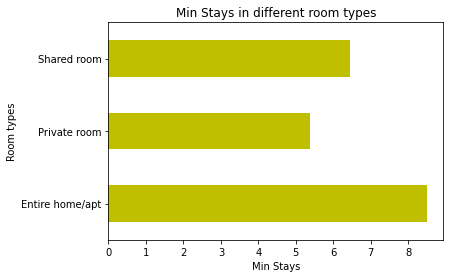

In [47]:
# minimum night stay in different room_type
df.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='y')
plt.title('Min Stays in different room types')
plt.ylabel('Room types')
plt.xlabel('Min Stays')


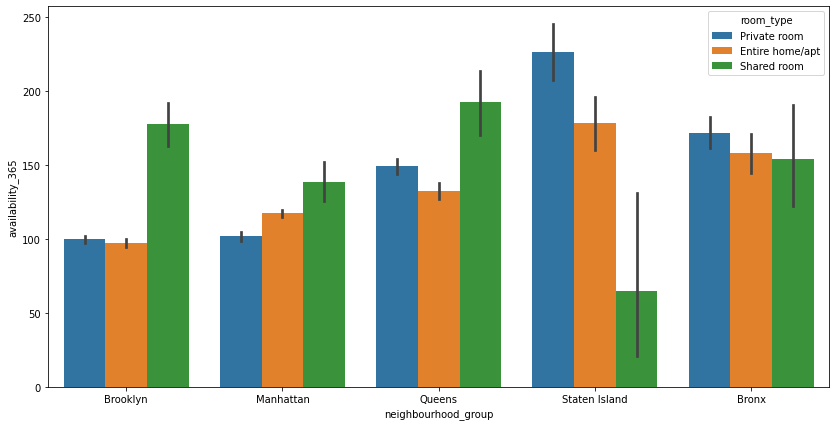

In [48]:
plt.figure(figsize = (14,7))
sns.barplot(x = 'neighbourhood_group', y = 'availability_365', data = df, hue='room_type')
plt.show()


# conclusion

Manhattan and Brooklyn are the prime neighbourhood group with highest number of rooms with premium properties.

Manhattan is the most expensive place while Queens and Statent island is cheap and less popular.

In Manhattan people perfer to rent entire home and apartment.

Most properties have price in the range $0-200

People prefer to list there properties for minimun number of nights less than a week or for a month. 

Expensive properties have less reviews, which means people less likely to rent expensive rooms and prefer cheaper properties to live. 
